In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
# Выгржаем данные из CSV
df = pd.read_csv('for_python.csv')
df.head()

user_id       region registration_date  transaction_id  user_id.1  \
0        1  Новосибирск        2024-11-15            5792          1   
1        1  Новосибирск        2024-11-15            7586          1   
2        1  Новосибирск        2024-11-15            8692          1   
3        1  Новосибирск        2024-11-15           13161          1   
4        1  Новосибирск        2024-11-15           28916          1   

  transaction_date  amount group  
0       2024-09-26    8170     A  
1       2024-10-24    3607     A  
2       2024-11-07    1441     A  
3       2024-09-17    3949     B  
4       2024-09-26    4258     A

In [3]:
# Общая статистика по датасету
df.describe()

user_id  transaction_id   user_id.1       amount
count  200.000000      200.000000  200.000000   200.000000
mean    20.170000    23916.785000   20.170000  5334.675000
std     11.966079    15479.124274   11.966079  2672.817759
min      1.000000       14.000000    1.000000   650.000000
25%      9.000000     8833.750000    9.000000  2920.250000
50%     19.000000    24177.000000   19.000000  5695.000000
75%     31.000000    37436.500000   31.000000  7620.750000
max     41.000000    49881.000000   41.000000  9999.000000

In [4]:
# Смотрим типы данных
print(df.dtypes)

user_id               int64
region               object
registration_date    object
transaction_id        int64
user_id.1             int64
transaction_date     object
amount                int64
group                object
dtype: object


In [5]:
# Делим выборки на тестовые и реальные
main_df = df.query("group.str.contains('А')")
test_df = df.query("group.str.contains('B')")

print(main_df)
print(test_df)

Empty DataFrame
Columns: [user_id, region, registration_date, transaction_id, user_id.1, transaction_date, amount, group]
Index: []
     user_id        region registration_date  transaction_id  user_id.1  \
3          1   Новосибирск        2024-11-15           13161          1   
6          2  Екатеринбург        2024-04-15            1260          2   
8          2  Екатеринбург        2024-04-15            7336          2   
11         2  Екатеринбург        2024-04-15           30416          2   
13         3        Москва        2024-06-12           10888          3   
..       ...           ...               ...             ...        ...   
194       40  Екатеринбург        2024-01-10            4100         40   
195       40  Екатеринбург        2024-01-10           10940         40   
197       41        Москва        2024-10-07            4403         41   
198       41        Москва        2024-10-07            9988         41   
199       41        Москва        2024-10-0

In [6]:
# Берем только одну колонку - суммы покупок
main_df = df["amount"]
test_df = df["amount"]

In [7]:
# Преобразуем датафрейм в массив
main_array = main_df.values
test_array = test_df.values

In [8]:
# Смотрим массивы
print(main_array)
print(test_array)

[8170 3607 1441 3949 4258 4630 7066 6636 4276 2629 7908 5302 5671 6878
 9999 5472 2897 8781  650 6921 2580 6186 9806 6683  743 6816 9191 8758
 9274 5003  870 8110 4535 6989 5735 4180 6466 4572 3372 2378  798 6184
 8096 1375 1650 4419 6209 1696 3969 1242 8209 3421 7412 1965 2212 9504
 5531 3164 6165 1987 8178 8686 8383 7946 6780 6751 4554 3063 6633  749
 6952 6100 2089 7915 1797 4084  672 1072 7668 9201 2928 1343 9051 1948
 3950 1482 5985 6337 4617 6257 9754 8957 4770 3469 3443 3957 4150 2597
 2230 7605 2115 1323 7814 6986 8595 5205  730 7581 8312 5897 2393 8243
 9258 1458 9508 9840 8168 6286 3965 5178 6773 3349 8035 7552 5738 4577
 8416 9717 6786 4779 5719 7946 5029 6321 7720 6826 8589 2078 9877 2628
 1775 5938 8651 9921 7310 9551 3695 2506 2381  660 7051 7825 7298  804
 7834 4111  690 5935 4926 1889 1160 2570 7343 9536 9481 2581  832 8364
 2280 6266 2320 8625 3423 3349 3535 5638 6254 8582 4633 5317 1729 6433
 5901 7404 4392 4522 5422 5937 2320 2472 8592 2630 4253 6226 6134 7895
 7848 

In [9]:
# Проводим двухвыборочный t-тест
stat, p = ttest_ind(main_array, test_array)

In [13]:
# Выводим результаты
print("t-статистика:", stat)
print("p-значение:", p)

t-статистика: 0.0
p-значение: 1.0


In [14]:
# Вывод - 0 гипотеза отклоняется, результаты статистически не значимы

In [15]:
# Средний чек по группам
mean_df = df.groupby('group').mean("amount")
mean_df.head()

user_id  transaction_id  user_id.1       amount
group                                                   
A      20.372340    23578.372340  20.372340  5413.308511
B      19.990566    24216.886792  19.990566  5264.943396

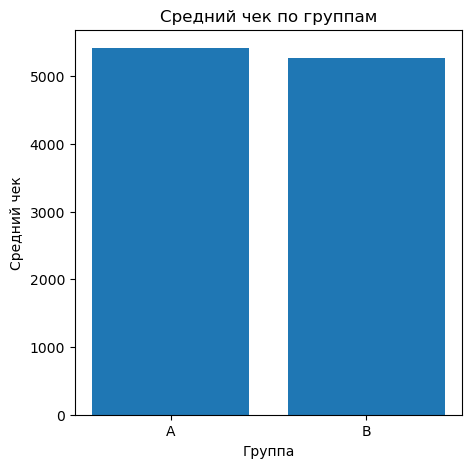

In [16]:
# График среднего чека по группам
plt.figure(figsize=(5, 5))
plt.bar(mean_df.index, mean_df['amount'])
plt.title('Средний чек по группам')
plt.xlabel('Группа')
plt.ylabel('Средний чек')
plt.show()

#%matplotlib inline

In [17]:
# Объемы продаж по группам
grouped_df = df.groupby('group').sum("amount")
grouped_df.head()

user_id  transaction_id  user_id.1  amount
group                                            
A         1915         2216367       1915  508851
B         2119         2566990       2119  558084

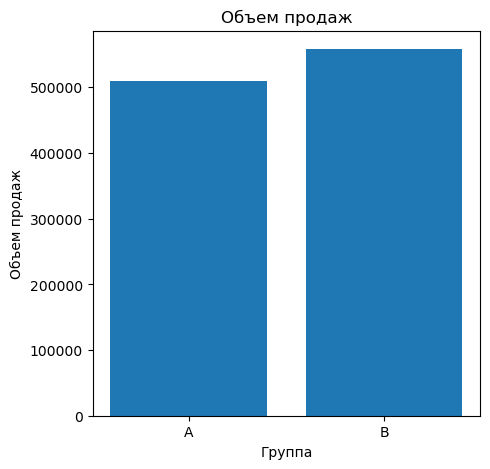

In [18]:
# График объема продаж по группам
plt.figure(figsize=(5, 5))
plt.bar(grouped_df.index, grouped_df['amount'])
plt.title('Объем продаж')
plt.xlabel('Группа')
plt.ylabel('Объем продаж')
plt.show()

#%matplotlib inline